## Automatización de la evaluación

In [75]:
import pandas as pd
import numpy as np
import os
import sys

# Agregar src al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from modeling.predict import evaluate_model
from features.build_features import build_features
from modeling.predict import load_model
from sklearn.metrics import f1_score

### Cargar el modelo entrenado

In [77]:
model_path = os.path.join(os.getcwd(), "..", "models", "random_forest_model.joblib")
model = load_model(model_path)

In [81]:
print(df_resultados.columns)

Index(['Mes', 'Ejemplos', 'F1-score'], dtype='object')


### Evaluación mensual del modelo

In [92]:
meses = ["2020-01", "2020-02", "2020-05", "2020-08"]
url_base = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{mes}.parquet"

def evaluar_modelo_mensual(model, meses, url_base):
    resultados = []
    target_col = "tip_amount"  # Ajusta este nombre si tu variable objetivo es otra

    for mes in meses:
        try:
            print(f"Procesando {mes}...")
            url = url_base.format(mes=mes)
            df = pd.read_parquet(url)
            X, y = build_features(df, target_col=target_col)

            # Mostrar columnas usadas por el modelo
            print(f"Features para {mes}:")
            print(X.columns.tolist())

            f1 = evaluate_model(model, X, y)
            resultados.append({
                "Mes": mes,
                "F1-score": f1,
                "Ejemplos": len(df)
            })
        except Exception as e:
            print(f"Error al procesar {mes}: {e}")
    
    return pd.DataFrame(resultados)

In [94]:
df_resultados = evaluar_modelo_mensual(model, meses, url_base)
display(df_resultados)

Procesando 2020-01...


C:\Users\raval\Dropbox\Magister Data Science\5TRIMESTRE\Desarrollo_Proyectos_y_Productos_Datos\Tarea_01\nyc_tips_classifier\src\features\build_features.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)


Error al procesar 2020-01: too many values to unpack (expected 2)
Procesando 2020-02...


C:\Users\raval\Dropbox\Magister Data Science\5TRIMESTRE\Desarrollo_Proyectos_y_Productos_Datos\Tarea_01\nyc_tips_classifier\src\features\build_features.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)


Error al procesar 2020-02: too many values to unpack (expected 2)
Procesando 2020-05...


C:\Users\raval\Dropbox\Magister Data Science\5TRIMESTRE\Desarrollo_Proyectos_y_Productos_Datos\Tarea_01\nyc_tips_classifier\src\features\build_features.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)


Error al procesar 2020-05: too many values to unpack (expected 2)
Procesando 2020-08...
Error al procesar 2020-08: too many values to unpack (expected 2)


C:\Users\raval\Dropbox\Magister Data Science\5TRIMESTRE\Desarrollo_Proyectos_y_Productos_Datos\Tarea_01\nyc_tips_classifier\src\features\build_features.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features + [target_col]] = df[features + [target_col]].astype("float32").fillna(-1.0)


""


In [95]:
import matplotlib.pyplot as plt

def graficar_resultados(df_resultados):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color = 'tab:blue'
    ax1.set_xlabel("Mes")
    ax1.set_ylabel("F1-score", color=color)
    ax1.plot(df_resultados["Mes"], df_resultados["F1-score"], marker='o', color=color, label="F1-score")
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:gray'
    ax2.set_ylabel("Cantidad de ejemplos", color=color)
    ax2.bar(df_resultados["Mes"], df_resultados["Ejemplos"], alpha=0.3, color=color, label="Cantidad de ejemplos")
    ax2.tick_params(axis='y', labelcolor=color)

    fig.suptitle("Evaluación del Modelo por Mes")
    fig.tight_layout()
    plt.show()

KeyError: 'Mes'

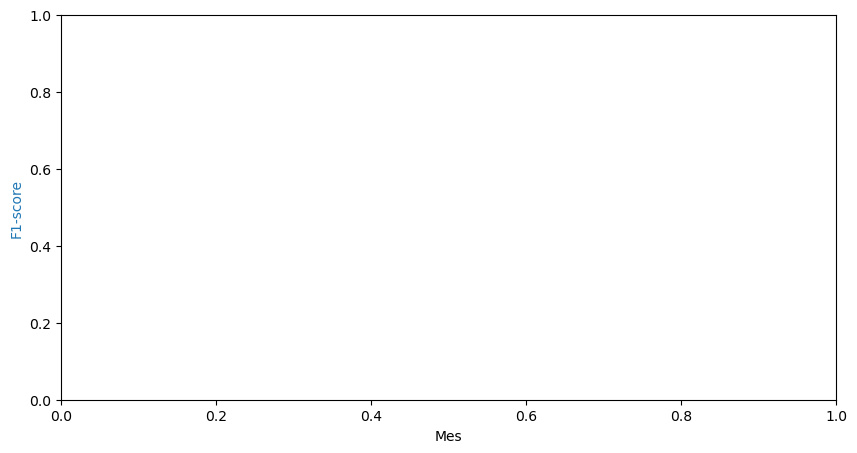

In [96]:
graficar_resultados(df_resultados)

# Consistencia del modelo: ¿El F1-score varía mucho entre meses?


Posibles causas:

Cambios en el comportamiento de los usuarios (COVID en marzo/abril 2020).

Cambios estacionales en los datos (clima, turismo, etc.).

Variación en el volumen o tipo de viajes registrados.